week5

다음 사이트에서 insurance.csv 데이터를 다운 받아 주세요.

https://www.kaggle.com/datasets/mirichoi0218/insurance/code 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###1. Medical Cost Perconal Datasets을 이용한 선형 회귀 문제

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1.1 'insurance.csv' 데이터셋을 로드하여 insurance 변수에 저장하고, head()를 통해 데이터를 확인하세요.

In [3]:
insurance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron 3기_DS/data/Week5/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1.2 데이터의 정보를 확인하세요.

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1.3 데이터의 기본 통계량을 확인하세요.

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1.4  'sex', 'smoker', 'region' 세 카테고리 변수는 인코딩이 필요합니다. 'get_dummies'를 이용하여 원핫 인코딩을 진행하세요.

In [6]:
insurance = pd.get_dummies(insurance,columns = ['sex', 'smoker', 'region'])
insurance.head()

# 컬럼의 개수가 증가하였다.

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


1.5 독립변수(X), 종속변수(y = 'charges')을 분리한 후 'train_test_split'으로 학습 데이터와 테스트 데이터를 분리해주세요. (test_size = 0.3, random_state=0) 

In [7]:
from sklearn.model_selection import train_test_split
y = insurance['charges']
X = insurance.drop('charges',axis = 1,inplace = False)

📌 **실수한 부분**  
drop(inplace = True)를 하는 경우 return 값이 없다.

In [8]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)

In [11]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1163,18,28.215,0,1,0,1,0,1,0,0,0
196,39,32.800,0,1,0,1,0,0,0,0,1
438,52,46.750,5,1,0,1,0,0,0,1,0
183,44,26.410,0,1,0,1,0,0,1,0,0
1298,33,27.455,2,0,1,1,0,0,1,0,0


In [12]:
y_train.head()

1163     2200.83085
196      5649.71500
438     12592.53450
183      7419.47790
1298     5261.46945
Name: charges, dtype: float64

In [13]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
578,52,30.200,1,0,1,1,0,0,0,0,1
610,47,29.370,1,1,0,1,0,0,0,1,0
569,48,40.565,2,0,1,0,1,0,1,0,0
1034,61,38.380,0,0,1,1,0,0,1,0,0
198,51,18.050,0,1,0,1,0,0,1,0,0


In [14]:
y_test.head()

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64

1.6 사이킷런 LinearRegression 클래스를 통해 회귀 모델 학습/예측을 수행해주세요.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression() # 선형 회귀 모델 객체 생성
lr.fit(X_train,y_train) # 학습
y_preds = lr.predict(X_test) # 예측

1.7 사이킷런 API를 이용해 MAE, MSE, RMSE, R2 평가지표로 평가를 수행하고 출력하세요.


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
mae = mean_absolute_error(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)

print('MAE : {0:.3f} / MSE : {1:.3f} / RMSE : {2:.3f} / R2 : {3:.3f}'.format(mae,mse,rmse,r2))

MAE : 4011.450 / MSE : 33342497.827 / RMSE : 5774.296 / R2 : 0.791


1.8 LinearRegression의 속성을 이용해 절편과 회귀계수를 출력해주세요.

In [19]:
lr.coef_ # 회귀 계수를 배열 형태로 저장

array([   256.43544682,    335.36907276,    472.70978916,     23.77337759,
          -23.77337759, -11717.99558474,  11717.99558474,    589.02469054,
           27.12354518,   -405.723989  ,   -210.42424672])

In [20]:
lr.intercept_ # 절편 값

-730.1121662702553

1.9 coef_ 속성은 회귀계수만을 보여주기 때문에, 어떤 칼럼에 대한 회귀 계수인지 알 수 없습니다. 피처별 회귀계수 값을 매핑하여 높은 순으로 출력하세요.

In [21]:
coef = pd.Series(data = np.round(lr.coef_, 1),index = X.columns)
coef.sort_values(ascending = False)

smoker_yes          11718.0
region_northeast      589.0
children              472.7
bmi                   335.4
age                   256.4
region_northwest       27.1
sex_female             23.8
sex_male              -23.8
region_southwest     -210.4
region_southeast     -405.7
smoker_no          -11718.0
dtype: float64

1.10 이번에는 교차검증을 통해 MAE, MSE를 계산해보겠습니다. 'neg'에 주의하여 'cross_val_score'을 실시하고 [개별 negative MAE scores] [개별 MSE scores] 그리고 [평균 RMSE]를 출력해주세요. (cv=3)

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
lr = LinearRegression()
neg_mae_scores = cross_val_score(lr,X,y,scoring = "neg_mean_absolute_error",cv = 3)
neg_mse_scores = cross_val_score(lr,X,y,scoring = "neg_mean_squared_error",cv = 3)
mse_scores = -1 * neg_mse_scores
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('3 folds의 개별 negative MAE scores : ',np.round(neg_mae_scores,2))
print('3 folds의 개별 MSE scores : ',np.round(mse_scores,2))
print('3 folds의 평균 RMSE : ',np.round(avg_rmse,3))

3 folds의 개별 negative MAE scores :  [-4266.93 -4097.77 -4341.61]
3 folds의 개별 MSE scores :  [37388213.08 34952866.56 40020943.28]
3 folds의 평균 RMSE :  6117.632


1.11 'age', 'bmi', 'children'에 대한 'charges'의 OLS summary를 출력하세요.

In [24]:
import statsmodels.formula.api as smf

results = smf.ols('charges ~ age + bmi + children', data = insurance).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           8.80e-37
Time:                        02:09:42   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.0

### 2. 경사하강법

[make_regression()](https://datascienceschool.net/03%20machine%20learning/04.01%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EC%98%88%EC%A0%9C.html)은 가상의 회귀분석 문제를 제공해주는 명렁어입니다. 이 명령어를 이용해 경사하강법 실습을 해보겠습니다.

먼저 다음의 코드를 실행해 X, y, w를 생성해주세요.



In [25]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples = 50, n_features = 1, bias = 100, noise = 10, coef = True, random_state = 0
)

2.1 y는 1차원 배열입니다. 'reshape' 명령어를 통해 y를 2차원 배열로 변환하고, X, y의 shape을 출력해주세요.

In [26]:
print(X.shape)

(50, 1)


In [27]:
y = y.reshape(len(y),1)
print(y.shape)

(50, 1)


2.2 X, y의 산점도를 출력해주세요.

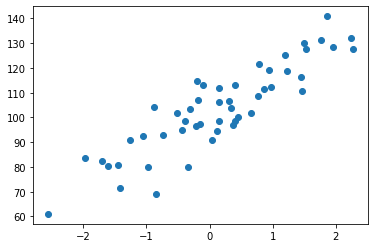

In [28]:
plt.scatter(X,y)

2.3 경사하강법을 위한 get_weight_updates, gradient_descent_stpes, get_cost 함수를 완성해주세요. 빈 괄호를 채워주세요.

In [29]:
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
  N = len(y)
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  w0_factors = np.ones((N,1))

  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
  return w1_update, w0_update

In [30]:
def gradient_descent_steps(X, y, iters = 10000):

    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [31]:
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)/N)
  return cost

2.4 gradient_descent_steps 함수를 이용해 w1, w0을 계산하여 출력하세요. 또 get_cost 함수를 이용해 실제값과 예측값의 RSS 차이를 출력하세요.

In [32]:
# 예측값과 실제값의 RSS 차이를 계산하는 함수 생성
w1, w0 = gradient_descent_steps(X,y,iters = 1000)
print('w1: {0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('경사 하강 total cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1: 13.920 w0:101.714
경사 하강 total cost: 64.1102


2.5 X,y의 산점도와 함께 앞에서 구한 y_pred 기반 회귀선을 그려주세요.

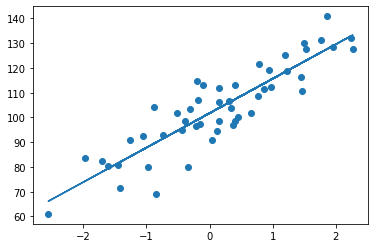

In [33]:
plt.scatter(X,y)
plt.plot(X,y_pred)

### 3. 규제 선형 모델

#### 
alpha 값의 변화에 따른 릿지 회귀를 수행해보겠습니다.
릿지의 alpha 값을 0, 0.1, 1, 10, 100으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0, 0.1, 1, 10, 100]

In [34]:
### 1번 문제의 dataset을 다시 활용하기
# 사실 무슨 데이터를 이용해야 하는지 몰라서 임의로 설정 후 진행하였습니다.

y_target= insurance['charges']
X_data = insurance.drop('charges',axis = 1,inplace = False)

In [35]:
from sklearn.linear_model import Ridge

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구하기
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 6113.224 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 6072.407 
alpha 1 일 때 5 folds 의 평균 RMSE : 6072.443 
alpha 10 일 때 5 folds 의 평균 RMSE : 6078.190 
alpha 100 일 때 5 folds 의 평균 RMSE : 6442.869 


#### 
릿지 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [38]:
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data = ridge.coef_ , index = X_data.columns)
    colname ='alpha:'+ str(alpha)
    coeff_df[colname] = coeff

In [39]:
### alpha 값에 따른 컬럼별 회귀계수
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+ str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
children,7.214665e+02,475.494224,475.436877,474.820180,465.582620
bmi,3.459688e+02,339.181665,339.076048,338.065597,331.228569
age,2.575053e+02,256.853283,256.825701,256.554472,254.241965
smoker_yes,-1.040515e+18,11921.493887,11896.592025,11653.239226,9677.670082
smoker_no,-1.040515e+18,-11921.493887,-11896.592025,-11653.239226,-9677.670082
region_northwest,-1.515581e+18,233.826079,231.862004,213.101025,88.138956
region_northeast,-1.515581e+18,586.834455,585.266199,570.041509,452.770454
region_southwest,-1.515581e+18,-373.059255,-373.213686,-374.469578,-368.327597
region_southeast,-1.515581e+18,-447.601278,-443.914518,-408.672957,-172.581812
sex_male,-2.330668e+18,-65.478686,-63.878162,-48.442781,61.985752


📌 **enumerate**
- 기본적으로 인덱스와 원소로 이루어진 튜플(tuple)을 만들어 줌  
=> fit 할려면 X 하나, y 하나만 있어야 하는데 enumerate로 반복문 돌렸더니 index가 따라붙어서 valueError 났던 것임.. 

#### 
alpha 값의 변화에 따른 라쏘 회귀를 수행해보겠습니다.
라쏘의 alpha 값을 0.07, 0.1, 0.5, 1, 3으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0.07, 0.1, 0.5, 1, 3]

In [40]:
from sklearn.linear_model import Lasso

In [41]:
# 릿지에 사용될 alpha 파라미터 값 정의하기
alphas =  [0.07, 0.1, 0.5, 1, 3]

# alphas list 값을 반복하면서 alpha에 따른 평균  rmse 구하기
for alpha in alphas:
  lasso = Lasso(alpha = alpha)
  
  # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0.07 일 때 5 folds 의 평균 RMSE : 6442.869 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 6442.869 
alpha 0.5 일 때 5 folds 의 평균 RMSE : 6442.869 
alpha 1 일 때 5 folds 의 평균 RMSE : 6442.869 
alpha 3 일 때 5 folds 의 평균 RMSE : 6442.869 


#### 
라쏘 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [42]:
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_data, y_target)

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data = lasso.coef_ , index = X_data.columns)
    colname ='alpha:'+ str(alpha)
    coeff_df[colname] = coeff

In [43]:
### alpha 값에 따른 컬럼별 회귀계수
lasso_alphas =  [0.07, 0.1, 0.5, 1, 3]
sort_column = 'alpha:'+ str(lasso_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
region_northeast,8.906420e+02,8.904238e+02,8.875057e+02,8.838694e+02,8.693243e+02
region_northwest,5.376730e+02,5.374526e+02,5.345145e+02,5.308420e+02,5.161519e+02
children,4.754529e+02,4.754324e+02,4.751596e+02,4.748190e+02,4.734565e+02
bmi,3.391784e+02,3.391719e+02,3.390871e+02,3.389794e+02,3.385488e+02
age,2.568568e+02,2.568570e+02,2.568617e+02,2.568650e+02,2.568784e+02
sex_female,1.310014e+02,1.308673e+02,1.290778e+02,1.268425e+02,1.179015e+02
smoker_yes,3.308747e-11,1.312002e-11,3.096356e-11,1.891290e-11,2.418063e-11
sex_male,-1.409344e-13,-0.000000e+00,-0.000000e+00,-7.749906e-14,-0.000000e+00
region_southwest,-6.881903e+01,-6.878434e+01,-6.832408e+01,-6.774601e+01,-6.543370e+01
region_southeast,-1.437546e+02,-1.437047e+02,-1.430365e+02,-1.422052e+02,-1.388797e+02


#### 
alpha 값의 변화에 따른 엘라스틱넷 회귀를 수행해보겠습니다. l1_ratio는 0.5로 고정하겠습니다.
엘라스틱넷의 alpha 값을 0.07, 0.1, 0.5, 1, 3으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0.07, 0.1, 0.5, 1, 3]

In [44]:
from sklearn.linear_model import ElasticNet

In [45]:
alphas = [0.07, 0.1, 0.5, 1, 3]
for alpha in alphas:
  elastic = ElasticNet(alpha = alpha, l1_ratio = 0.5)
  neg_mse_scores = cross_val_score(elastic,X_data,y_target,scoring = "neg_mean_squared_error",cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ',np.round(np.round(neg_mse_scores,3)))
print('5 folds의 개별 RMSE scores: ',np.round(rmse_scores),3)
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-1.04089364e+08 -8.66719920e+07 -1.00769905e+08 -9.81474380e+07
 -1.07093920e+08]
5 folds의 개별 RMSE scores:  [10202.  9310. 10038.  9907. 10349.] 3
5 folds의 평균 RMSE: 9961.236


#### 
엘라스틱 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [46]:
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for alpha in alphas:
    elastic = ElasticNet(alpha = alpha)
    elastic.fit(X_data, y_target)

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data = elastic.coef_ , index = X_data.columns)
    colname ='alpha:'+ str(alpha)
    coeff_df[colname] = coeff

In [47]:
### alpha 값에 따른 컬럼별 회귀계수
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
sort_column = 'alpha:'+ str(lasso_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
smoker_yes,10753.802509,10320.281145,6719.914886,4683.535228,2119.079972
region_northeast,515.196732,489.587745,294.719264,196.326918,82.358766
children,471.583750,469.455230,431.963218,384.815364,261.220919
bmi,334.656475,333.191126,324.813852,322.072216,315.997687
age,255.525975,255.015668,250.419836,247.519072,243.229559
region_northwest,150.249808,123.513992,-19.145061,-47.240585,-38.906154
sex_male,5.180770,29.037902,167.890560,188.468297,133.966138
sex_female,-5.160047,-29.021618,-167.940443,-188.475367,-133.966258
region_southeast,-290.330866,-239.811660,33.587432,89.245469,75.580248
region_southwest,-375.071052,-373.249730,-309.148499,-238.331498,-119.032874


### 4.Logistic Regression

Dataset <fish.csv>를 다운 받아주세요!
#### fish의 Weight, Length, Diagnal, Height, Width 정보를 바탕으로 fish의 Species를 분류하는 예제

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

#### 'fish.csv'로 fish_df를 생성하세요

In [49]:
fish_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron 3기_DS/data/Week5/fish.csv')
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


#### fish 데이터 세트의 target 배열은 Species입니다.
#### fish_df를 y_target, X_data로 분리해주세요

In [50]:
y_target = fish_df['Species']
X_data = fish_df.drop('Species',axis = 1,inplace = False)

In [51]:
X_data.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [52]:
y_target

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

#### X_data와 y_target을 X_train, X_test, y_train, y_test으로 나누세요. (test_size=0.3, random_state=42)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_target,test_size = 0.3, random_state = 42)

In [54]:
X_train.head()

,Weight,Length,Diagonal,Height,Width
85,130.0,21.3,22.8,6.3840,3.5340
81,85.0,20.0,21.0,5.0820,2.7720
112,685.0,36.5,39.0,10.8810,6.8640
11,500.0,31.0,36.2,14.3714,4.8146
109,514.0,32.8,34.0,10.0300,6.0180


In [55]:
X_test.head()

,Weight,Length,Diagonal,Height,Width
78,78.0,18.7,19.4,5.1992,3.1234
155,13.4,12.4,13.5,2.4300,1.2690
128,200.0,32.3,34.8,5.5680,3.3756
55,270.0,26.0,28.7,8.3804,4.2476
94,150.0,23.0,24.5,5.2185,3.6260


In [56]:
y_train.head()

85     Perch
81     Perch
112    Perch
11     Bream
109    Perch
Name: Species, dtype: object

In [57]:
y_test.head()

78         Perch
155        Smelt
128         Pike
55     Whitefish
94         Perch
Name: Species, dtype: object

#### StandardScaler를 이용해 데이터 변환을 해주세요

In [58]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)
# 해당 fit으로 test 데이터도 transform
X_test_scaled = scaler.transform(X_test)

#### 로지스틱 회귀를 이용해서 학습 및 예측을 수행하고 정확도와 ROC-AUC값을 구하세요 (solver = liblinear, C=20, max_iter=1000)

In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
lr_clf = LogisticRegression(solver = 'liblinear',C = 20, max_iter = 1000)
lr_clf.fit(X_scaled, y_train)
lr_preds = lr_clf.predict(X_test_scaled)
lr_preds_proba = lr_clf.predict_proba(X_test_scaled)

# 정확도와 roc_auc 측정하기
print('accuracy: {:0.3f}'.format(accuracy_score(y_test,lr_preds))) 
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test,lr_preds_proba,multi_class = 'ovr'))) # 다중 분류 문제

accuracy: 0.938
roc_auc: 0.989


📌 **다중 분류**  
- 규칙에 따라 입력된 값을 세 그룹 이상으로 분류하는 작업을 의미
- 구분하려는 결과가 A 그룹, B 그룹, C 그룹 등으로 데이터를 나누는 경우
- 하나의 특성(feature)이나 여러 개의 특성(feature)으로부터 나온 값을 계산해 각각의 클래스(Class)에 속할 확률을 추정